In [1]:
import os
import sys
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
from matplotlib_venn import venn3

In [2]:
def GO_terms():
    var_holder = {} #Varibles for iteration
    filelist = [file for file in os.listdir(sys.path[0]) if file.endswith("1%.txt") ] #To only open .txt files
    for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
        TFile =  pd.read_csv(os.path.join(sys.path[0], filename),sep="\t",header=0, index_col = 0)
        for GO in TFile.index.values.tolist():
            var_holder[GO] = TFile.loc[GO,"description"]
            
    return var_holder
    

In [3]:
def plot_Venn_diagram(net,GOterms):
    var_holder = [] #Varibles for iteration
    filelist = [file for file in os.listdir(sys.path[0]) if file.startswith(net) and file.endswith("1%.txt") ] #To only open .txt files
    for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
        TFile =  pd.read_csv(os.path.join(sys.path[0], filename),sep="\t",header=0, index_col = 0)
        var_holder.append(TFile.index.values.tolist())

    if net == "net1" : Netname = "Reactome network"
    elif net == "net8" : Netname = "Dorothea network"
    else : Netname = "a network"
        
    name = f'{net}_allvsaggrvsnonaggr'
    set1 = set(var_holder[1]) #For the order of the labels
    set2 = set(var_holder[0])
    set3 = set(var_holder[2])
    v=venn3([set1, set2, set3], ('all', 'aggr', 'nonaggr'))
    plt.title(f'Venn diagram of the all, aggr and nonaggr Go terms in \n prostate cancers for {Netname} and 1% top genes',size=12)
    plt.savefig(f'GO_Comparison_{net}.png',bbox_inches="tight")
    plt.show()
    
    
    ALL = set1.union(set2).union(set3)
    UAggr = set2 - set1.union(set3)
    UNAgg = set3 - set1.union(set2)
    Intersec = set1.intersection(set2,set3)
    print("\nAll GO terms",ALL)
    for GO in ALL:
        print(f"{GO} : {GOterms[GO]}")    
    print("\nUnique GO terms in aggressive",UAggr)
    for GO in UAggr:
        print(f"{GO} : {GOterms[GO]}")
    print("\nUnique GO terms in non aggressive",UNAgg)
    for GO in UNAgg:
        print(f"{GO} : {GOterms[GO]}")
    print("\nGo terms in common for aggressive and non aggresive",Intersec)
    for GO in Intersec:
        print(f"{GO} : {GOterms[GO]}")
    return [UAggr,UNAgg,Intersec,ALL]

In [4]:
GOterms = GO_terms()

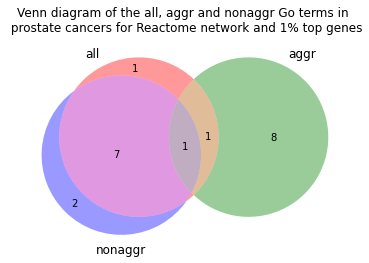


All GO terms {'GO:0070997', 'GO:0002764', 'GO:0050673', 'GO:0043062', 'GO:0071559', 'GO:0001503', 'GO:0090130', 'GO:0001525', 'GO:0006352', 'GO:0050890', 'GO:0006289', 'GO:0060537', 'GO:0098742', 'GO:0150076', 'GO:0051090', 'GO:0048511', 'GO:0031349', 'GO:0198738', 'GO:0099177', 'GO:0001667'}
GO:0070997 : neuron death
GO:0002764 : immune response-regulating signaling pathway
GO:0050673 : epithelial cell proliferation
GO:0043062 : extracellular structure organization
GO:0071559 : response to transforming growth factor beta
GO:0001503 : ossification
GO:0090130 : tissue migration
GO:0001525 : angiogenesis
GO:0006352 : DNA-templated transcription, initiation
GO:0050890 : cognition
GO:0006289 : nucleotide-excision repair
GO:0060537 : muscle tissue development
GO:0098742 : cell-cell adhesion via plasma-membrane adhesion molecules
GO:0150076 : neuroinflammatory response
GO:0051090 : regulation of DNA-binding transcription factor activity
GO:0048511 : rhythmic process
GO:0031349 : positive re

In [5]:
NET1 = plot_Venn_diagram("net1",GOterms)

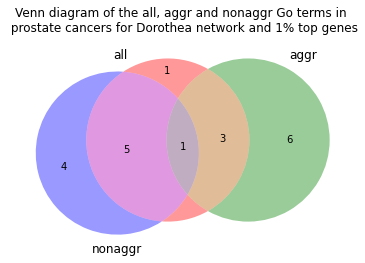


All GO terms {'GO:0002764', 'GO:0050673', 'GO:0007492', 'GO:0001503', 'GO:0048545', 'GO:0030522', 'GO:0045165', 'GO:0006352', 'GO:1903706', 'GO:0001655', 'GO:0040029', 'GO:0098742', 'GO:0150076', 'GO:0050769', 'GO:0009755', 'GO:0002521', 'GO:0033002', 'GO:0048732', 'GO:1901652', 'GO:0002009'}
GO:0002764 : immune response-regulating signaling pathway
GO:0050673 : epithelial cell proliferation
GO:0007492 : endoderm development
GO:0001503 : ossification
GO:0048545 : response to steroid hormone
GO:0030522 : intracellular receptor signaling pathway
GO:0045165 : cell fate commitment
GO:0006352 : DNA-templated transcription, initiation
GO:1903706 : regulation of hemopoiesis
GO:0001655 : urogenital system development
GO:0040029 : regulation of gene expression, epigenetic
GO:0098742 : cell-cell adhesion via plasma-membrane adhesion molecules
GO:0150076 : neuroinflammatory response
GO:0050769 : positive regulation of neurogenesis
GO:0009755 : hormone-mediated signaling pathway
GO:0002521 : leuk

In [6]:
NET8 = plot_Venn_diagram("net8",GOterms)

In [7]:
print("\nSUMMARY OF THE GO\n")

Aggr = NET1[0].intersection(NET8[0])
print("\nGO terms in common for aggressive",Aggr)
for GO in Aggr:
    print(f"{GO} : {GOterms[GO]}")

NAggr = NET1[1].intersection(NET8[1])
print("\nGO terms in common for non aggressive",NAggr)
for GO in NAggr:
    print(f"{GO} : {GOterms[GO]}")

Int = NET1[2].intersection(NET8[2])
print("\nGO terms in common for the intersection aggresive and non aggresive",Int)
for GO in Int:
    print(f"{GO} : {GOterms[GO]}")
    
All = NET1[3].intersection(NET8[3]) - Aggr 
print("\nGO terms in common for both networks (Omit aggr in common)",All)
for GO in All:
    print(f"{GO} : {GOterms[GO]}")

ExNt1 = NET1[3] - NET8[3]
print("\nGO terms exclusive for Net1",ExNt1)
for GO in ExNt1:
    print(f"{GO} : {GOterms[GO]}")
    
AggrNt1 = NET1[0] - Aggr
print("\nGO terms aggressive exclusive for Net1",AggrNt1)
for GO in AggrNt1:
    print(f"{GO} : {GOterms[GO]}")

ExNt8 = NET8[3] - NET1[3]
print("\nGO terms exclusive for Net8",ExNt8)
for GO in ExNt8:
    print(f"{GO} : {GOterms[GO]}")
    
AggrNt8 = NET8[0] - Aggr
print("\nGO terms aggressive exclusive for Net8",AggrNt8)
for GO in AggrNt8:
    print(f"{GO} : {GOterms[GO]}")


SUMMARY OF THE GO


GO terms in common for aggressive {'GO:0006352', 'GO:0098742', 'GO:0001503', 'GO:0150076'}
GO:0006352 : DNA-templated transcription, initiation
GO:0098742 : cell-cell adhesion via plasma-membrane adhesion molecules
GO:0001503 : ossification
GO:0150076 : neuroinflammatory response

GO terms in common for non aggressive set()

GO terms in common for the intersection aggresive and non aggresive set()

GO terms in common for both networks (Omit aggr in common) {'GO:0050673', 'GO:0002764'}
GO:0050673 : epithelial cell proliferation
GO:0002764 : immune response-regulating signaling pathway

GO terms exclusive for Net1 {'GO:0060537', 'GO:0070997', 'GO:0043062', 'GO:0051090', 'GO:0048511', 'GO:0071559', 'GO:0031349', 'GO:0001667', 'GO:0090130', 'GO:0001525', 'GO:0006289', 'GO:0198738', 'GO:0099177', 'GO:0050890'}
GO:0060537 : muscle tissue development
GO:0070997 : neuron death
GO:0043062 : extracellular structure organization
GO:0051090 : regulation of DNA-binding transcri

In [8]:
def plot_Venn_diagram2(net,GOterms):
    var_holder = [] #Varibles for iteration
    filelist = [file for file in os.listdir(sys.path[0]) if file.startswith(net) and file.endswith("1%.txt") ] #To only open .txt files
    for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
        TFile =  pd.read_csv(os.path.join(sys.path[0], filename),sep="\t",header=0, index_col = 0)
        var_holder.append(TFile.index.values.tolist())

    if net == "net1" : Netname = "Reactome network"
    elif net == "net8" : Netname = "Dorothea network"
    else : Netname = "a network"
        
    name = f'{net}_allvsaggrvsnonaggr'
    set1 = set(var_holder[1]) #For the order of the labels
    set2 = set(var_holder[0])
    set3 = set(var_holder[2])
    v=venn3([set1, set2, set3], ('all', 'aggr', 'nonaggr'))
    #plt.title(f'Venn diagram of the all, aggr and nonaggr Go terms in \n prostate cancers for {Netname} and 1% top genes',size=12)
    plt.savefig(f'{net}.png',bbox_inches="tight")
    plt.show()

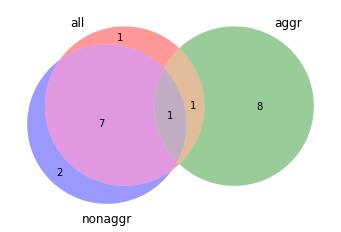

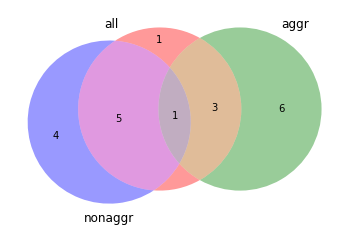

In [9]:
plot_Venn_diagram2("net1",GOterms)
plot_Venn_diagram2("net8",GOterms)

In [10]:
def GO_gens():
    gen_holder = {}
    filelist = [file for file in os.listdir(sys.path[0]) if file.endswith("1%.txt") ] #To only open .txt files
    for filename in filelist: #This part could be merged with the filelist to save one line, but for a correction in the order of files I did it separately
        TFile =  pd.read_csv(os.path.join(sys.path[0], filename),sep="\t",header=0, index_col = 0)
        for GO in TFile.index.values.tolist():
            if GO not in gen_holder : gen_holder[GO] = set(TFile.loc[GO,"userId"].split(";"))
            else : gen_holder[GO] = gen_holder[GO].union( set(TFile.loc[GO,"userId"].split(";")) )
            
    return gen_holder
    


In [14]:
GOgens = GO_gens()

In [16]:
print(len(GOgens))

34


In [12]:
table = [["GO terms","Description","Genes"] ]
for GO in GOgens : 
    table.append([GO, GOterms[GO], str(GOgens[GO]).replace("{","").replace("}","") ])
DF = pd.DataFrame(table[1:] , columns = table[0] )
DF = DF.set_index('GO terms')

In [13]:
used = ["GO:0001667", "GO:0001525" ,"GO:0198738" ,"GO:0071559" ,"GO:0090130" ,"GO:0060537" ,"GO:0006289" ,"GO:0040029" ,"GO:1903706","GO:0001655" ,"GO:0033002" ,"GO:0048732" ,"GO:0048545" ,"GO:0002009" ,"GO:0009755" ,"GO:0002764" ,"GO:0006352" ,"GO:0001503" ,"GO:0098742" ,"GO:0150076","GO:0016569","GO:004211","GO:0002694"]
DF2 = DF[DF.index.isin(used)].sort_values(by=['GO terms'])
DF2

,Description,Genes
GO terms,,
GO:0001503,ossification,"'EGFR', 'MMP9', 'RYR1', 'COL11A1', 'BMPR2', 'I..."
GO:0001525,angiogenesis,"'RHOA', 'MYH9', 'MED1', 'PIK3CA', 'JUN', 'NOTC..."
GO:0001655,urogenital system development,"'MEF2C', 'HES1', 'HOXB13', 'ITGA3', 'GLI2', 'S..."
GO:0001667,ameboidal-type cell migration,"'RHOA', 'MTOR', 'MYH9', 'PIK3CA', 'JUN', 'ERBB..."
GO:0002009,morphogenesis of an epithelium,"'RHOA', 'MTOR', 'HOXB13', 'RHOC', 'MED1', 'SHH..."
GO:0002764,immune response-regulating signaling pathway,"'NR1D1', 'PIK3R2', 'APOB', 'PIK3CA', 'JUN', 'G..."
GO:0006289,nucleotide-excision repair,"'EP300', 'BRIP1', 'TP53', 'ERCC2', 'POLR2B'"
GO:0006352,"DNA-templated transcription, initiation","'NR1D1', 'PGR', 'BRF2', 'ESR1', 'MED12', 'TP53..."
GO:0009755,hormone-mediated signaling pathway,"'NR1D1', 'KMT2D', 'ESR1', 'MED12', 'EP300', 'N..."


In [37]:
NewOutput = DF2.to_csv(sep="\t", index=True, index_label="GO terms")
with open(os.path.join(sys.path[0], "Relevant_GO.csv"), "w") as thefile:
    thefile.write(NewOutput)
    print("The file with remain data is saved")
thefile.close()


The file with remain data is saved
